In [119]:
# Import Libraries
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import spacy

import wordcloud
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [120]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Goutham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
conda install -c conda-forge wordcloud

# Extracting Product reviews from Amazon

In [121]:
from bs4 import BeautifulSoup as bs
import requests



pages=input("pls enter number of pages:")
review_title=[]



for i in range(1,int(pages)+1):
    url="https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/ref=cm_cr_arp_d_paging_btm_next_2?pageNumber="+str(i)
    page=requests.get(url)
    soup=bs(page.content,'html.parser')
    review = soup.find_all('span',class_="review-text-content")
    
    for i in range(0,len(review)):
        review_title.append(review[i].get_text())
    
print("Total Reviews for the OnePlus CE2 Smart Phone:",len(review_title))

pls enter number of pages:400
Total Reviews for the OnePlus CE2 Smart Phone: 3670


In [144]:
import pandas as pd

Reviews=pd.DataFrame(review_title,columns=["Reviews"])
Reviews.head()

,Reviews
0,\nHang problem\n
1,\nI'm writing this review after using 3days !!...
2,\nCamera is so good n very fast phone back loo...
3,\n\n\n\n\n The media could ...
4,\nI got my delivery on 23 feb when I unboxed t...


In [145]:
Reviews.to_csv('oneplus_reviews.csv')

In [170]:
df=Reviews
df.head()

,Reviews
0,\nHang problem\n
1,\nI'm writing this review after using 3days !!...
2,\nCamera is so good n very fast phone back loo...
3,\n\n\n\n\n The media could ...
4,\nI got my delivery on 23 feb when I unboxed t...


In [172]:
df.shape

(3670, 1)

In [173]:
df.describe()

,Reviews
count,3670
unique,3090
top,
freq,146


In [174]:
df.duplicated().sum()  #checking for duplicate reviews

580

#### Removing duplicate Reviews

In [175]:
df1=df.drop_duplicates().reset_index(drop=True) # droping duplicate reviews
df1.shape

(3090, 1)

#### Checking for no of words in each review

In [176]:
df1['Reviews_length'] = df1['Reviews'].str.split().apply(len)  #checking the length of the reviews 
df1.head()

,Reviews,Reviews_length
0,\nHang problem\n,2
1,\nI'm writing this review after using 3days !!...,65
2,\nCamera is so good n very fast phone back loo...,170
3,\n\n\n\n\n The media could ...,182
4,\nI got my delivery on 23 feb when I unboxed t...,110


#### Checking for Avg Length of the reviews written by the consumers

18.966990291262135


<AxesSubplot:ylabel='Frequency'>

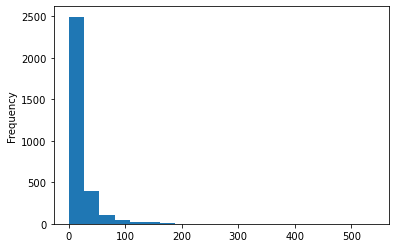

In [177]:
print(df1['Reviews_length'].mean())  #checking for avg length of reviews

df1['Reviews_length'].plot(bins=20, kind='hist',figsize = (6,4))

#### Checking for no of stop words in each review

In [178]:
stop = stopwords.words('english')

df1['Stopwords'] =df1['Reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
df1[['Reviews','Stopwords']].head()

,Reviews,Stopwords
0,\nHang problem\n,0
1,\nI'm writing this review after using 3days !!...,15
2,\nCamera is so good n very fast phone back loo...,51
3,\n\n\n\n\n The media could ...,59
4,\nI got my delivery on 23 feb when I unboxed t...,48


# Text pre-processing

#### Removing the all characters except Alphabets

In [179]:
df1.Reviews=df.Reviews.apply(lambda x:re.sub('[^a-zA-Z ]',"",x))
df1.head()

,Reviews,Reviews_length,Stopwords
0,Hang problem,2,0
1,Im writing this review after using days Be to ...,65,15
2,Camera is so good n very fast phone back look ...,170,51
3,The media could not be loa...,182,59
4,I got my delivery on feb when I unboxed the p...,110,48


#### Converting the reviews into Lower case 

In [180]:
df1.Reviews=df1.Reviews.apply(lambda x:x.lower())  #converting the reviews into lower case
df1.head()

,Reviews,Reviews_length,Stopwords
0,hang problem,2,0
1,im writing this review after using days be to ...,65,15
2,camera is so good n very fast phone back look ...,170,51
3,the media could not be loa...,182,59
4,i got my delivery on feb when i unboxed the p...,110,48


#### Removing STOP WORDS

In [181]:
stop_words=stopwords.words('english')
sw_list=[
        "day","look","one","loaded","dont",
        "hai","call","day","samsung","im","writing","review","could","r","its","mp","also","if","ur","u",
        "im","n","dat","frm","itsif","dis","wit","w","c",'os','gb','k','etc','g','mm','vooc','oppo','hz','bit','would',"phone",
        "week","per","first","hr","come","say","user","aa","aaj","aap","aaya","aayi","ab","abhi"]
stop_words.extend(sw_list)

In [182]:
df1['Reviews'] = df1['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

#Review Length after removing special characters and stop words
df1['Reviews_length_2'] = df1['Reviews'].str.split().apply(len) 
df1.head()

,Reviews,Reviews_length,Stopwords,Reviews_length_2
0,hang problem,2,0,2
1,using days honest normal android phoneits like...,65,15,35
2,camera good fast back awesomewith price segmen...,170,51,73
3,media average product decent activity thing li...,182,59,80
4,got delivery feb unboxed display damaged reque...,110,48,48


#### Removing common words

In [183]:
freq = pd.Series(' '.join(df1['Reviews']).split()).value_counts()[:10]
freq

good        1338
camera       932
battery      723
quality      601
mobile       422
oneplus      295
product      273
like         266
charging     258
price        256
dtype: int64

In [184]:
freq = list(freq.index)

In [185]:
df1['Reviews'] = df1['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#Review Length after removing some common words
df1['Reviews_length_3'] = df1['Reviews'].str.split().apply(len)
df1[['Reviews','Reviews_length','Reviews_length_2','Reviews_length_3']].head()

,Reviews,Reviews_length,Reviews_length_2,Reviews_length_3
0,hang problem,2,2,2
1,using days honest normal android phoneits onep...,65,35,31
2,fast back awesomewith segment worth important ...,170,73,64
3,media average decent activity thing mention ex...,182,80,72
4,got delivery feb unboxed display damaged reque...,110,48,47


#### Checking for most frequent words in the reviews using wordcloud

In [88]:
sen_df=[Reviews.strip() for Reviews in df1.Reviews]
sentn=' '.join(sen_df)

In [89]:
import nltk
from nltk.tokenize import word_tokenize

rev_token=word_tokenize(sentn)

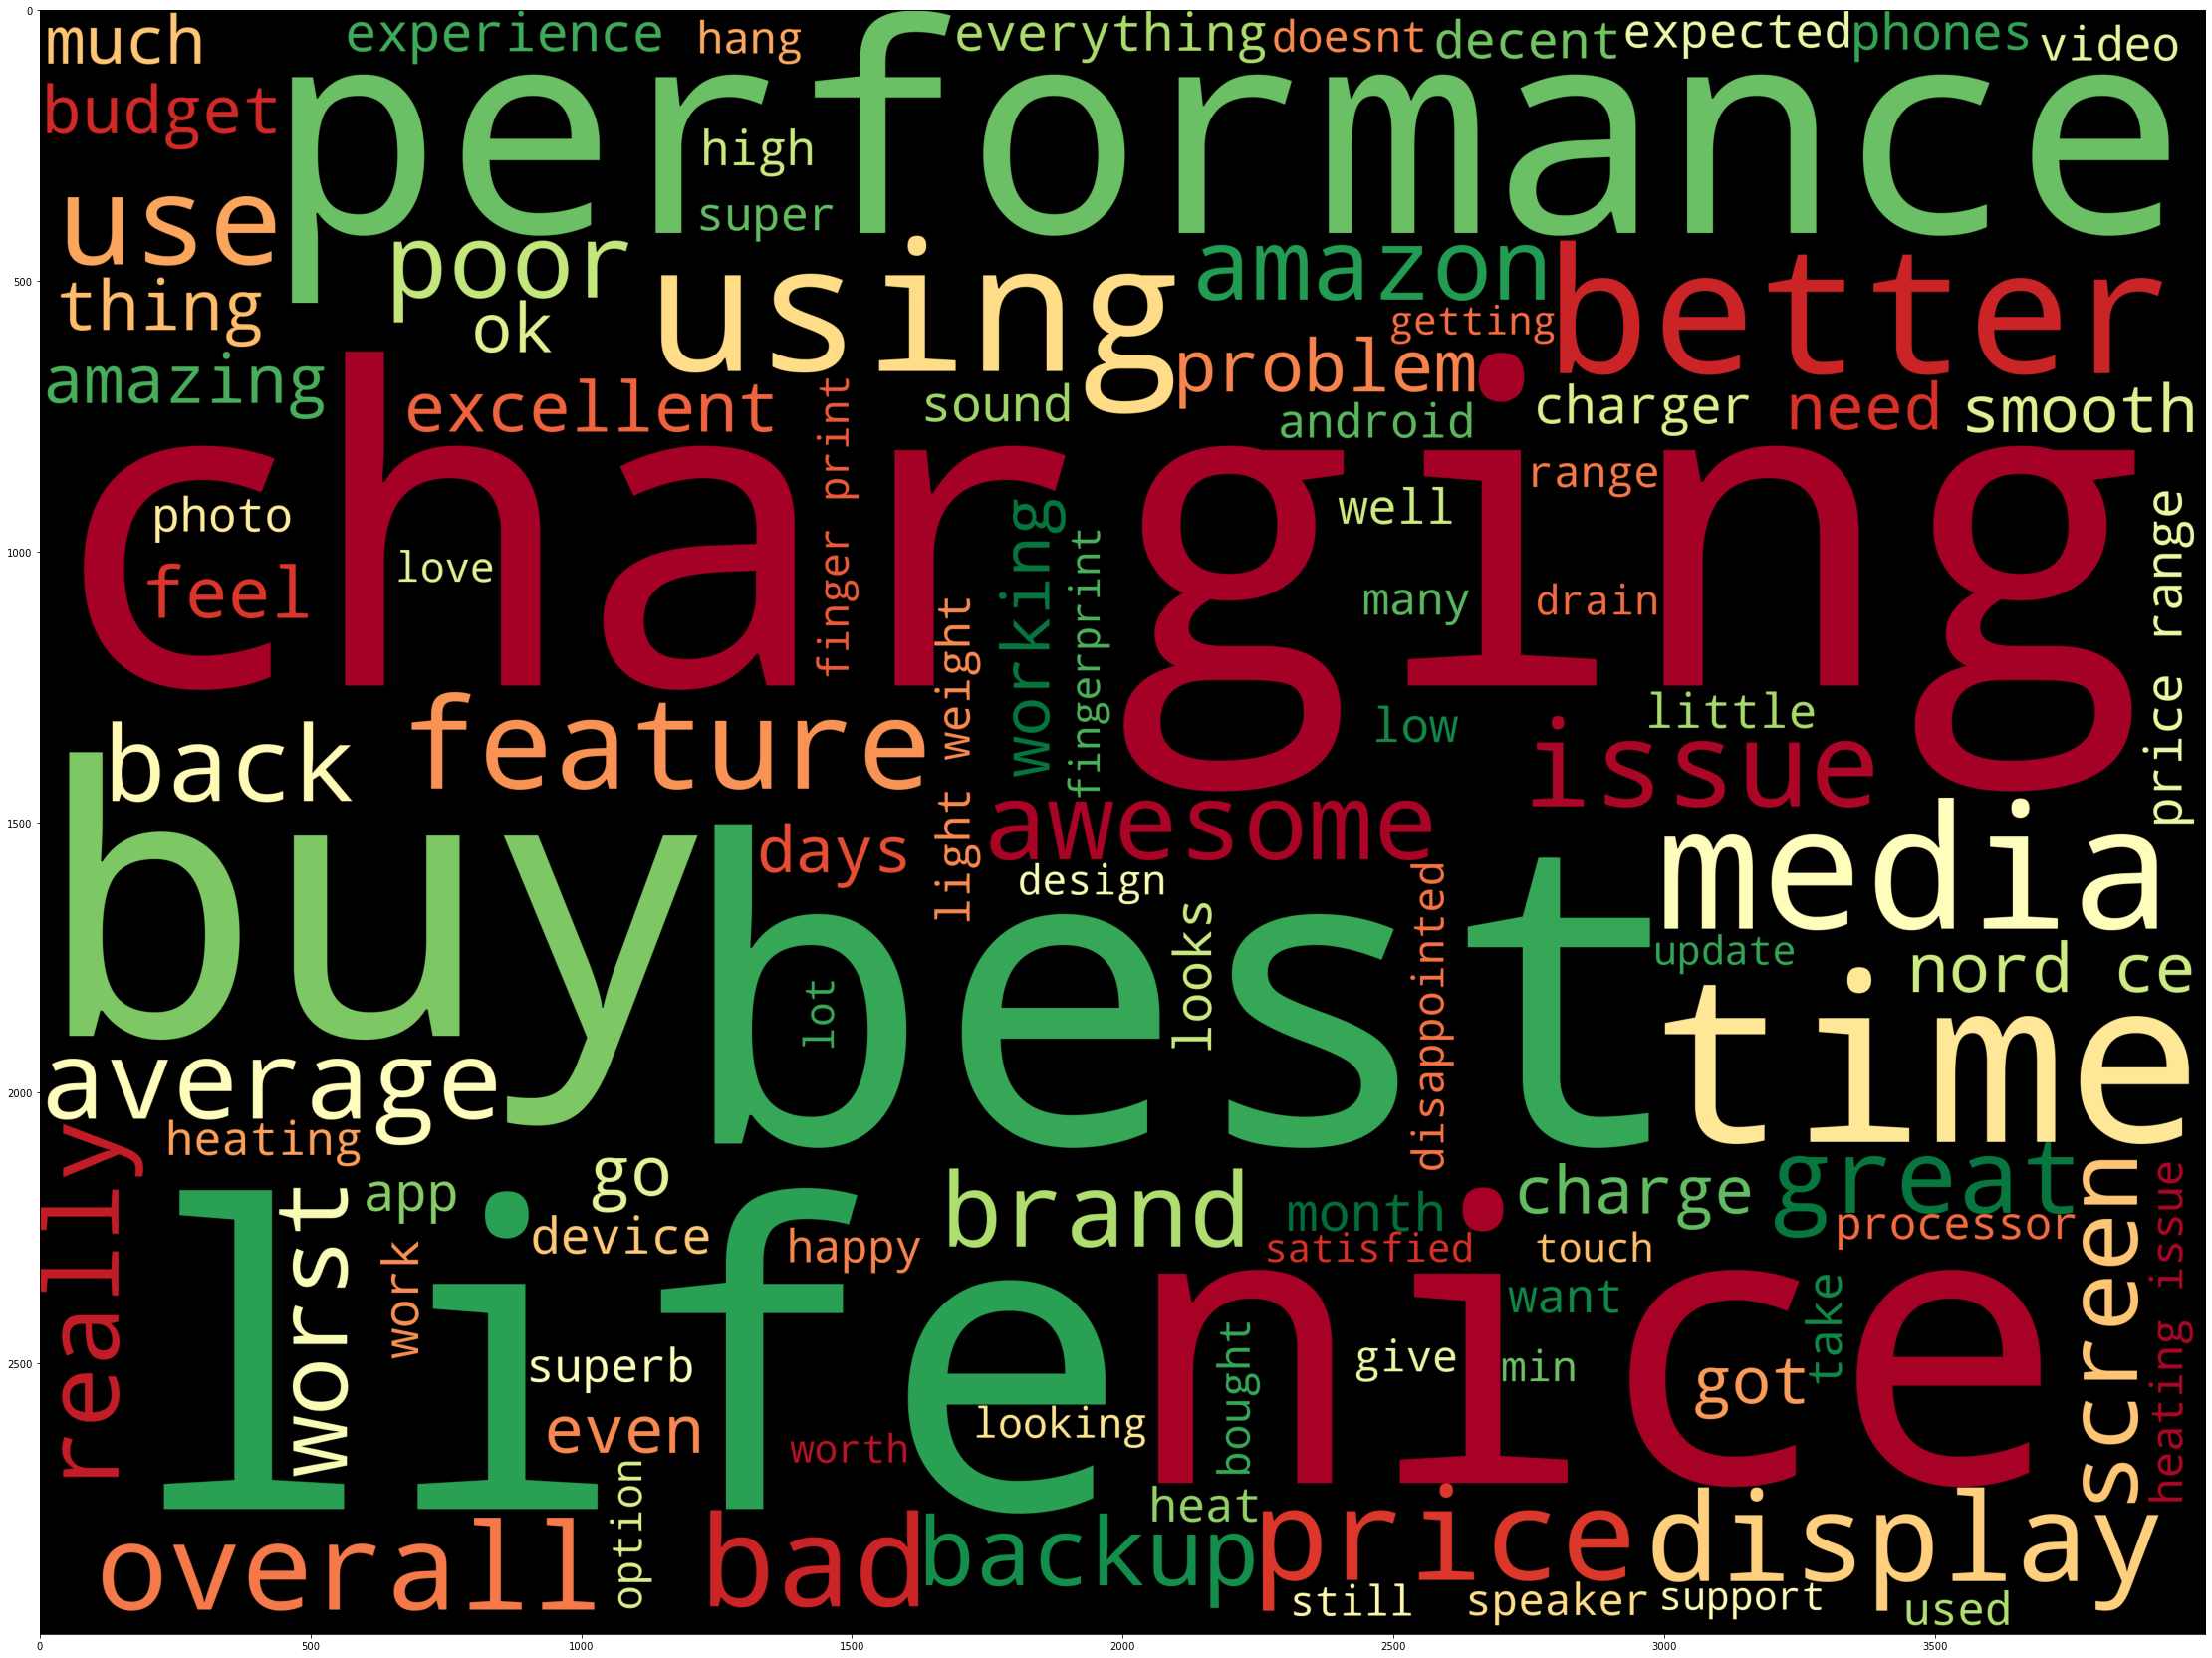

In [90]:
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('on')
    

wordcloud=WordCloud(width=4000,height=3000,background_color='black',max_words=100,
                   colormap='RdYlGn',contour_color='red',contour_width=5,stopwords=STOPWORDS).generate(sentn)
plot_cloud(wordcloud)

# Sentiment Analysis

In [186]:
affin=pd.read_csv("Afinn.csv",encoding='cp1252')
affinity_scores=affin.set_index('word')['value'].to_dict()

In [176]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.


     ---------------------------------------- 1.2/1.2 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 62.3.2
    Uninstalling setuptools-62.3.2:
      Successfully uninstalled setuptools-62.3.2



conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


     ---------------------------------------- 11.7/11.7 MB 3.9 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.0
    Uninstalling spacy-3.3.0:
      Successfully uninstalled spacy-3.3.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Goutham\\anaconda3\\Lib\\site-packages\\~pacy\\attrs.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



     ---------------------------------------- 12.8/12.8 MB 4.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [188]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [189]:
df1['Sentiment_Value']=df1['Reviews'].apply(calculate_sentiment)
df1['Sentiment_Value'].head()

0    -2
1     0
2    18
3     7
4    -1
Name: Sentiment_Value, dtype: int64

In [190]:
y=[]
for x in df1["Sentiment_Value"]:
    if x<0:
        y.append("Negative")
    elif x>0:
        y.append("Positive")
    else:
        y.append("Neutral")
        

In [191]:
df1["Category"]=pd.DataFrame(y)
df1["Category"].value_counts()

Neutral     1363
Positive    1176
Negative     551
Name: Category, dtype: int64

In [192]:
# negative sentiment score of the whole review
df1[df1['Sentiment_Value']<0].head()

,Reviews,Reviews_length,Stopwords,Reviews_length_2,Reviews_length_3,Sentiment_Value,Category
0,hang problem,2,0,2,2,-2,Negative
4,got delivery feb unboxed display damaged reque...,110,48,48,47,-1,Negative
8,buy phones amazon really bad exp dislikefor po...,158,50,83,72,-3,Negative
18,media starting days performing given rating re...,63,24,24,23,-2,Negative
19,phones display upto mark ive expected form low...,49,20,26,22,-3,Negative


In [193]:
# positive sentiment score of the whole review
df1[df1['Sentiment_Value']>0].head()

,Reviews,Reviews_length,Stopwords,Reviews_length_2,Reviews_length_3,Sentiment_Value,Category
2,fast back awesomewith segment worth important ...,170,51,73,64,18,Positive
3,media average decent activity thing mention ex...,182,59,80,72,7,Positive
5,media fabbut sometime apps gaana linkedin cras...,94,28,56,48,5,Positive
6,nord ce decent choice someone looking upgrade ...,456,154,253,233,19,Positive
12,media build rating light weight phones quite c...,539,214,236,220,26,Positive


In [194]:
# Neutral sentiment score of the whole review
df1[df1['Sentiment_Value']==0].head()

,Reviews,Reviews_length,Stopwords,Reviews_length_2,Reviews_length_3,Sentiment_Value,Category
1,using days honest normal android phoneits onep...,65,15,35,31,0,Neutral
7,heating problemand selfie goodother wise,19,9,7,5,0,Neutral
9,bakwas,3,0,2,1,0,Neutral
10,media grey mirror finish really cool smooth us...,76,31,32,28,0,Neutral
11,amazingly built decently featured smartphoneba...,28,4,18,18,0,Neutral


<AxesSubplot:xlabel='Sentiment_Value', ylabel='Density'>

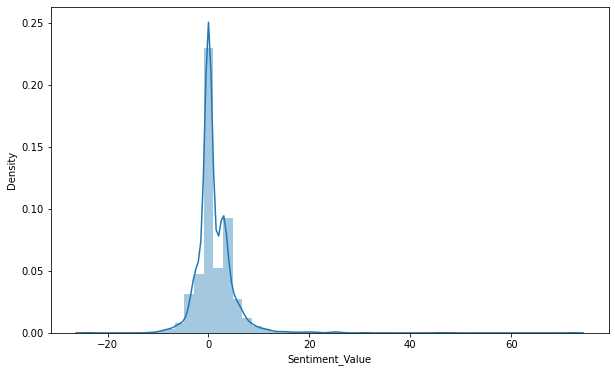

In [195]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(df1['Sentiment_Value'])

<AxesSubplot:xlabel='Category', ylabel='count'>

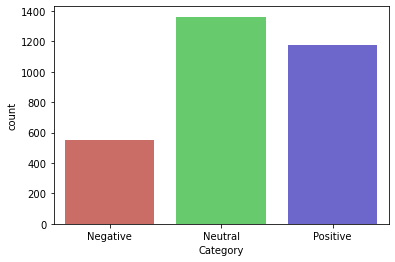

In [196]:
df1.Category.value_counts()
sns.countplot(x='Category', data=df1, palette='hls')

In [197]:
y=[]
for x in df1["Sentiment_Value"]:
    if x<0:
        y.append(0)
    elif x>0:
        y.append(1)
    else:
        y.append(2)


In [198]:
#Adding Response attribute to data frame
df1["Response"]=pd.DataFrame(y)

df2=df1.loc[:,["Reviews","Sentiment_Value","Category","Response"]]
df2.head()

,Reviews,Sentiment_Value,Category,Response
0,hang problem,-2,Negative,0
1,using days honest normal android phoneits onep...,0,Neutral,2
2,fast back awesomewith segment worth important ...,18,Positive,1
3,media average decent activity thing mention ex...,7,Positive,1
4,got delivery feb unboxed display damaged reque...,-1,Negative,0


## Stemming

In [199]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

df2.Reviews=df2.Reviews.apply(lambda x:x.split())
df2.Reviews=df2.Reviews.apply(lambda x:[ps.stem(word) for word in x])
df2.Reviews=df2.Reviews.apply(lambda x:" ".join(x))

df2.head()

,Reviews,Sentiment_Value,Category,Response
0,hang problem,-2,Negative,0
1,use day honest normal android phoneit oneplusc...,0,Neutral,2
2,fast back awesomewith segment worth import thi...,18,Positive,1
3,media averag decent activ thing mention exchan...,7,Positive,1
4,got deliveri feb unbox display damag request r...,-1,Negative,0


## Feauture Extraction using Count Vectorizer

In [200]:
X=df2["Reviews"]
Y=df2["Response"]

In [201]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#cv=CountVectorizer()
vect = TfidfVectorizer()

x=vect.fit_transform(X.values).toarray()
x=pd.DataFrame(x,columns=vect.get_feature_names())
x.head()

,aacha,aam,aayega,abid,abl,abnorm,abovei,absent,absolut,absurd,...,your,youtub,youtubeallow,youtubeamazon,yr,yrsstill,zaher,zen,zero,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
x.shape

(3090, 4483)

## Model Building

#### Logistic Regression

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [204]:
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=12)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12)
from sklearn.pipeline import Pipeline
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
train_pred=pipe_lr.predict(x_train)
test_pred=pipe_lr.predict(x_test)

In [205]:
log_trainscore=accuracy_score(y_train,train_pred)
log_testscore=accuracy_score(y_test,test_pred)
print(log_trainscore,log_testscore)

0.9741100323624595 0.8689320388349514


In [206]:
pd.crosstab(y_test,test_pred)

col_0,0,1,2
Response,,,
0,92,8,22
1,3,199,31
2,3,14,246


#### KNN

In [207]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [208]:
n_neighbors=np.array([2*i+1 for i in range(0,20)])
param_grid=dict(n_neighbors=n_neighbors)

KNN=KNeighborsClassifier()
grid=GridSearchCV(estimator=KNN,param_grid=param_grid,cv=10)
grid.fit(x,Y)
KNN_grid=grid.best_score_
KNN_param=grid.best_params_

print(KNN_grid,":",KNN_param)

0.5954692556634303 : {'n_neighbors': 1}


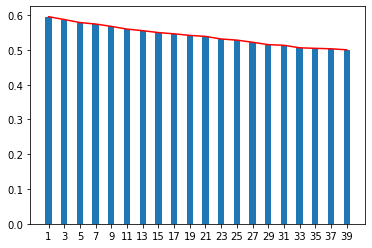

In [209]:
k_range=[2*i+1 for i in range(0,20)]
k_scores=[]
for k in k_range:
    KNN=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(KNN,x,Y,cv=10)
    k_scores.append(scores.mean())
    
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores,color="red")
plt.xticks(k_range)
plt.show()

#### Decision Tree

In [210]:
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [211]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.3,random_state=10)
model=DecisionTreeClassifier(criterion='gini',max_depth=15)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [212]:
predict=model.predict(x_test)
pd.crosstab(y_test,predict)

col_0,0,1,2
Response,,,
0,106,5,54
1,11,240,107
2,6,8,390


In [213]:
DT=np.mean(y_test==predict)
DT

0.7939590075512406

#### Random Forest

In [214]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import  RandomForestClassifier

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [215]:
k_range=[10,20,50,100,200,300,400,500]
k_scores=[]
max_features=5
for k in k_range:
    model=RandomForestClassifier(n_estimators=k,max_samples=0.8,max_features=max_features,random_state=8)
    results=cross_val_score(model,x,Y,cv=10)
    k_scores.append(results.mean())
    
k_scores

[0.7763754045307444,
 0.7987055016181229,
 0.8142394822006473,
 0.8119741100323624,
 0.8220064724919094,
 0.8242718446601941,
 0.8233009708737864,
 0.8229773462783172]

In [216]:
kfold=KFold(n_splits=10)
num_trees=100
max_features=5
model=RandomForestClassifier(n_estimators=num_trees,max_samples=0.8,max_features=max_features,random_state=8)
results=cross_val_score(model,x,Y,cv=kfold)
RF=results.mean()
RF

0.8249190938511326

In [218]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, x,Y, cv=kfold)
pd.crosstab(Y,y_pred)

col_0,0,1,2
Response,,,
0,339,47,165
1,15,928,233
2,19,62,1282


In [219]:
np.mean(y_pred==Y)

0.8249190938511327

#### SVM

In [220]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [221]:
train_X,test_X,train_Y,test_Y=train_test_split(x,Y,test_size=0.3,random_state=10)

In [222]:
model_linear=SVC(kernel='linear')
model_linear.fit(train_X,train_Y)

train_pred_lin=model_linear.predict(train_X)
test_pred_lin=model_linear.predict(test_X)

train_lin_acc=np.mean(train_pred_lin==train_Y)
test_lin_acc=np.mean(test_pred_lin==test_Y)

SVM_LINEAR=test_lin_acc
SVM_LINEAR

0.8543689320388349

In [223]:
model_rbf=SVC(C=15,gamma=0.0001,kernel='rbf')
model_rbf.fit(train_X,train_Y)

train_pred_rbf=model_linear.predict(train_X)
test_pred_rbf=model_linear.predict(test_X)

train_rbf_acc=np.mean(train_pred_lin==train_Y)
test_rbf_acc=np.mean(test_pred_lin==test_Y)


SVM_RBF=test_rbf_acc
SVM_RBF

0.8543689320388349

#### Bagging

In [317]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [ ]:
kfold=KFold(n_splits=10)
num_trees=100
model=BaggingClassifier(max_samples=0.8,n_estimators=num_trees,random_state=8)
results=cross_val_score(model,x,Y,cv=kfold)
BAG=results.mean()
BAG

#### AdaBoost

In [224]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [225]:
kfold=KFold(n_splits=10)
num_trees=100
model=AdaBoostClassifier(n_estimators=num_trees,learning_rate=0.8,random_state=8)
results=cross_val_score(model,x,Y,cv=kfold)
BOOST=results.mean()
BOOST

0.8161812297734627

#### Naive Bayes

In [226]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [227]:
train_X,test_X,train_Y,test_Y=train_test_split(x,Y,test_size=0.3,random_state=10)

In [228]:
Gmodel=GaussianNB()

Gmodel.fit(train_X,train_Y)
NB2=Gmodel.predict(test_X)
G_acc=np.mean(NB2==test_Y)
G_acc

0.41639697950377563

In [229]:
Mmodel = MultinomialNB()
Mmodel.fit(train_X,train_Y)
MB = Mmodel.predict(test_X)
M_acc = np.mean(MB==test_Y) 
M_acc

0.7605177993527508

In [230]:
my_dict={"Model":["Log_Reg","KNN","DecisionTree","RandomForest","SVM","ADABOOST","NB_Gaussian",'NB_Multinomial'],
         "Test_Accuracy":[log_testscore,KNN_grid,DT,RF,SVM_LINEAR,BOOST,G_acc,M_acc]}
DF=pd.DataFrame(my_dict)
DF

,Model,Test_Accuracy
0,Log_Reg,0.868932
1,KNN,0.595469
2,DecisionTree,0.793959
3,RandomForest,0.824919
4,SVM,0.854369
5,ADABOOST,0.816181
6,NB_Gaussian,0.416397
7,NB_Multinomial,0.760518


#### Dumping the file

In [231]:
import joblib
import pickle
from pickle import dump
from pickle import load

In [460]:
dump(pipe_lr,open('Logistic_regression.pkl','wb'))